In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# data
acidoCEST_ML = pd.read_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')


cols_2_drop = ['Unnamed: 0','ApproT1(sec)','Temp','FILE','Conc(mM)', 'ExpB0(ppm)']

acidoCEST_ML = acidoCEST_ML.drop(cols_2_drop, axis = 1)

In [3]:
#
exper_cols = ['ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)', 'ExpB0(Hz)', 'SatPower(uT)',  'SatTime(ms)']

In [4]:
# Logistic Regression

def train_logistic_PCA_pipeline(Xdata, pH_observed, pH_cut_off = 7.0, n_cs = 20):
    # cut off > pH
    y = 1*(pH_observed > pH_cut_off)
    # X data
    X = Xdata.copy()
        
    # Logistic
    logistic = linear_model.LogisticRegression(solver='liblinear', penalty='l1',max_iter=1000,random_state=42, n_jobs=1)

    # Training parameters
    Cs = np.logspace(-3, 2, n_cs)
    
    param_grid ={
    'C': Cs,
    'class_weight': ['balanced',None]
    }
    
    
    estimator = GridSearchCV(logistic, param_grid, verbose = 2, cv = 3, n_jobs= 9)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Grid Search of Model
    estimator.fit(X_train, y_train)
    
    #AUC
    y_probas = estimator.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)
    plt.show()
    
    print( metrics.classification_report(y_test, estimator.predict(X_test)) )
    

    return estimator.best_estimator_, X_train, X_test, y_train, y_test

In [5]:
## parameters

Ncs = 10

Fitting 3 folds for each of 20 candidates, totalling 60 fits


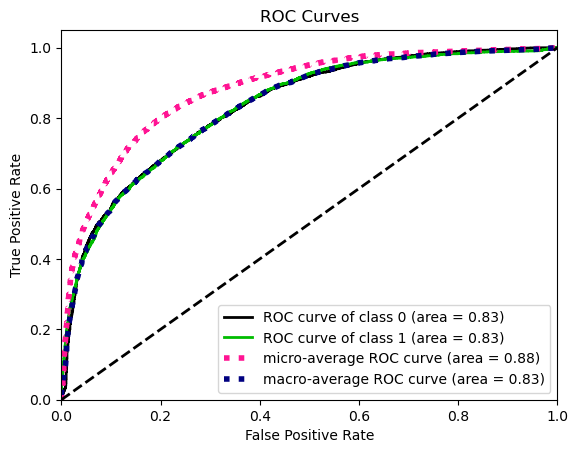

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7770
           1       0.77      0.40      0.53      3030

    accuracy                           0.80     10800
   macro avg       0.79      0.68      0.70     10800
weighted avg       0.80      0.80      0.78     10800

CPU times: user 1min 54s, sys: 529 ms, total: 1min 54s
Wall time: 1h 31min 14s


In [6]:
%%time
## Logistic REgression: Only Zspectra pH = 7.0


clf1, X_train, X_test, y_train, y_test = train_logistic_PCA_pipeline(acidoCEST_ML.drop(exper_cols + ['pH'],axis=1) 
                                                                    , acidoCEST_ML.pH
                                                                    , pH_cut_off = 7.0, n_cs = Ncs);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


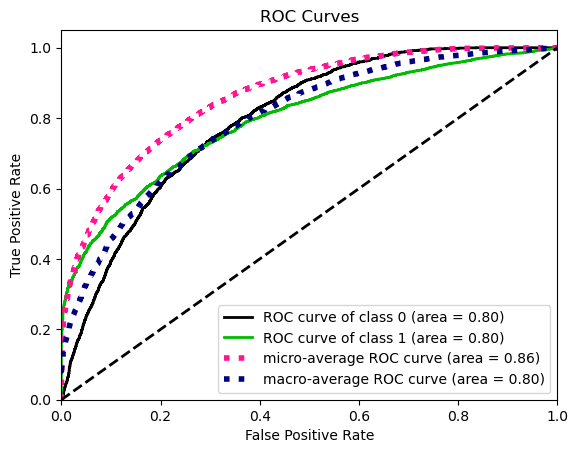

              precision    recall  f1-score   support

           0       0.60      0.29      0.39      2753
           1       0.79      0.93      0.86      8047

    accuracy                           0.77     10800
   macro avg       0.69      0.61      0.62     10800
weighted avg       0.74      0.77      0.74     10800

CPU times: user 1min 58s, sys: 576 ms, total: 1min 59s
Wall time: 55min 3s


In [7]:
%%time
## Logistic REgression: Only Zspectra pH = 6.5


clf2, X_train, X_test, y_train, y_test = train_logistic_PCA_pipeline(acidoCEST_ML.drop(exper_cols + ['pH'],axis=1) 
                                                                    , acidoCEST_ML.pH
                                                                    , pH_cut_off = 6.5, n_cs = Ncs);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


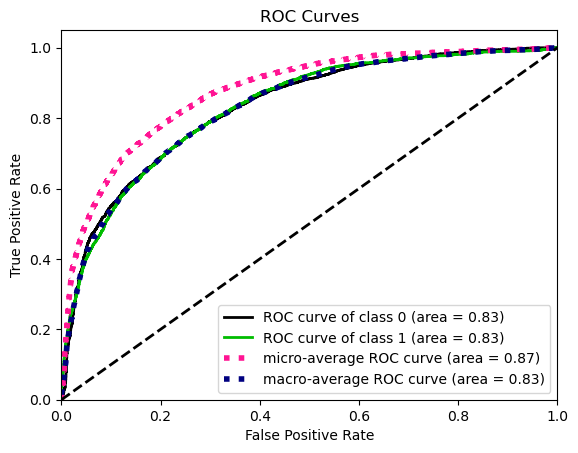

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7770
           1       0.78      0.34      0.48      3030

    accuracy                           0.79     10800
   macro avg       0.79      0.65      0.67     10800
weighted avg       0.79      0.79      0.76     10800



In [8]:
## Logistic REgression: All data pH = 7.0

clf3, X_train, X_test, y_train, y_test = train_logistic_PCA_pipeline(acidoCEST_ML.drop( ['pH'],axis=1) 
                                                                    , acidoCEST_ML.pH
                                                                    , pH_cut_off = 7.0, n_cs = Ncs);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


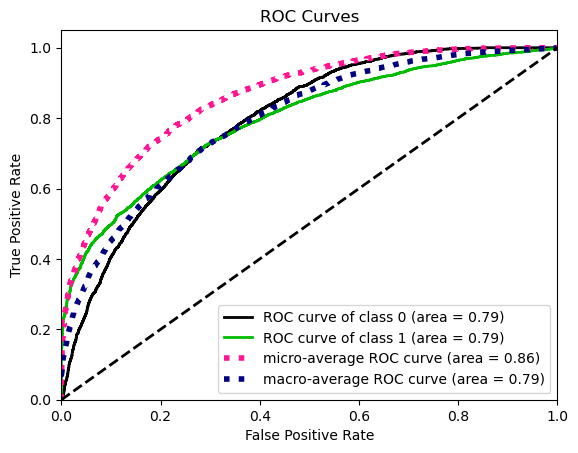

              precision    recall  f1-score   support

           0       0.63      0.28      0.39      2753
           1       0.79      0.94      0.86      8047

    accuracy                           0.77     10800
   macro avg       0.71      0.61      0.63     10800
weighted avg       0.75      0.77      0.74     10800



In [9]:
## Logistic REgression: All data pH = 6.5

clf4, X_train, X_test, y_train, y_test = train_logistic_PCA_pipeline(acidoCEST_ML.drop( ['pH'],axis=1) 
                                                                    , acidoCEST_ML.pH
                                                                    , pH_cut_off = 6.5, n_cs = Ncs);